# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
# how I fixed the AWS issue:
'''
1. Installed Anaconda on GPU instance
2. changed the default python path to anaconda python
3. Installed the required libraries
'''
# ! conda install -c conda-forge tqdm --yes

'\n1. Installed Anaconda on GPU instance\n2. changed the default python path to anaconda python\n3. Installed the required libraries\n'

In [2]:
# ! conda upgrade conda

In [3]:
# ! conda upgrade --all --yes

In [4]:
# ! conda remove matplotlib --yes
# ! conda install matplotlib==2.0 --yes

# import matplotlib as mpl
# print(mpl.__version__)

# ! conda install -c conda-forge matplotlib --yes

# ! conda create -n ishan python=3 --yes
# ! source activate ishan
# ! conda install numpy --yes
# ! conda install pandas --yes
# ! conda install -c conda-forge tqdm --yes
# ! conda install tensorflow-gpu --yes

In [5]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

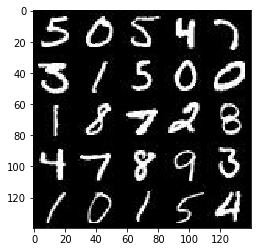

In [6]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

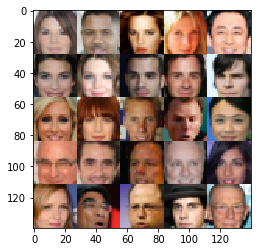

In [7]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [8]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [9]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(dtype = tf.float32, 
                                shape = (None, image_width, image_height, image_channels),
                                name = 'input_real')
    
    input_z = tf.placeholder(dtype = tf.float32, shape = (None, z_dim), name = 'input_z')
    lr = tf.placeholder(dtype = tf.float32, name = 'lr')

    return input_real, input_z, lr

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/home/ubuntu/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/home/ubuntu/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start\n    ioloop.IOLoop.instance().start()', 'File "/home/ubuntu/anaconda3/lib/python3.6/site-packages/zmq/eventloop

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [10]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
#     dropout = 0.7
    
    with tf.variable_scope('discriminator', reuse=reuse):
        layer_1 = tf.layers.conv2d(images, 64, 5, strides = 2, padding = 'same')
        layer_1 = tf.maximum(0.1 * layer_1, layer_1)
        
        # Second layer.
        layer_2 = tf.layers.conv2d(layer_1, 128, 5, strides = 2, padding = 'same')
        layer_2 = tf.layers.batch_normalization(layer_2, training = True)
        layer_2 = tf.maximum(0.1 * layer_2, layer_2)
        
        # Third layer.
        layer_3 = tf.layers.conv2d(layer_2, 256, 5, strides = 2, padding = 'same')
        layer_3 = tf.layers.batch_normalization(layer_3, training = True)
        layer_3 = tf.maximum(0.1 * layer_3, layer_3)
        
        # Let's "flattenize"
        flat_lay = tf.reshape(layer_3, (-1, 4*4*256))
#         dropout_lay = tf.layers.dropout(inputs = flat_lay, rate = dropout)
        
        # Defining the output variables.
        logits = tf.layers.dense(flat_lay, 1)
        outputs = tf.sigmoid(logits)
        
    return outputs, logits

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [11]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        alpha = 0.2
    
        layer_1 = tf.layers.dense(z, 2*2*512)
        layer_1 = tf.reshape(layer_1, (-1, 2, 2, 512))
        layer_1 = tf.layers.batch_normalization(layer_1, training=is_train)
        layer_1 = tf.maximum(alpha * layer_1, layer_1)
    
        layer_2 = tf.layers.conv2d_transpose(layer_1, 256, 5, 2, 'valid')
        layer_2 = tf.layers.batch_normalization(layer_2, training = is_train)
        layer_2 = tf.maximum(alpha * layer_2, layer_2)
    
        layer_3 = tf.layers.conv2d_transpose(layer_2, 128, 5, 2, 'same')
        layer_3 = tf.layers.batch_normalization(layer_3, training = is_train)
        layer_3 = tf.maximum(alpha * layer_3, layer_3)
    
        logits = tf.layers.conv2d_transpose(layer_3, out_channel_dim, 5, 2, 'same')
        logits = tf.tanh(logits)
    

    return logits

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [12]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [13]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables() # convenience function
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(
            learning_rate, beta1=beta1).minimize(
            d_loss, var_list=d_vars
        )
        g_train_opt = tf.train.AdamOptimizer(
            learning_rate, beta1=beta1).minimize(
            g_loss, var_list=g_vars
        )
        
    return d_train_opt, g_train_opt

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [14]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [15]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    # Let's train our adversarial model (or is it cooperative?)
    real_images_stream, z_data, lrate = model_inputs(data_shape[1],
                                                     data_shape[2],
                                                     data_shape[3],
                                                     z_dim)
    d_loss, g_loss = model_loss(real_images_stream, z_data, data_shape[3])
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, lrate, beta1)
    
    verbosity_show, verbosity_loss, step_counter = 100, 10, 1
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                batch_images *= 2
                _ = sess.run(d_train_opt, feed_dict={real_images_stream: batch_images,
                                                     z_data: batch_z, lrate: learning_rate})
                _ = sess.run(g_train_opt, feed_dict={z_data: batch_z, 
                                                     real_images_stream: batch_images,
                                                     lrate: learning_rate})
                
                if ((step_counter % verbosity_loss) == 0):
                    d_loss_val = d_loss.eval({z_data: batch_z, real_images_stream: batch_images})
                    g_loss_val = g_loss.eval({z_data: batch_z})
                    
                    
                    print("Epoch {}/{}.\t".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}; ".format(d_loss_val),
                          "Generator Loss: {:.4f}".format(g_loss_val))
                    
                if ((step_counter % verbosity_show) == 0):
                    show_generator_output(sess, 25, z_data, data_shape[3], data_image_mode)
                    
                step_counter += 1

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2.	 Discriminator Loss: 0.0743;  Generator Loss: 4.1289
Epoch 1/2.	 Discriminator Loss: 1.9044;  Generator Loss: 12.5902
Epoch 1/2.	 Discriminator Loss: 2.9926;  Generator Loss: 0.2344
Epoch 1/2.	 Discriminator Loss: 0.8674;  Generator Loss: 1.0119
Epoch 1/2.	 Discriminator Loss: 0.6033;  Generator Loss: 1.0799
Epoch 1/2.	 Discriminator Loss: 2.7572;  Generator Loss: 10.0041
Epoch 1/2.	 Discriminator Loss: 1.7626;  Generator Loss: 9.1730
Epoch 1/2.	 Discriminator Loss: 1.6474;  Generator Loss: 8.3710
Epoch 1/2.	 Discriminator Loss: 0.2739;  Generator Loss: 2.6246
Epoch 1/2.	 Discriminator Loss: 0.4610;  Generator Loss: 1.6109


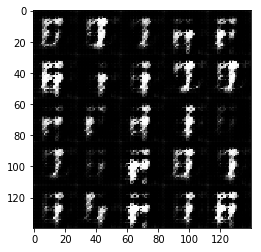

Epoch 1/2.	 Discriminator Loss: 1.6738;  Generator Loss: 7.3660
Epoch 1/2.	 Discriminator Loss: 0.8576;  Generator Loss: 1.3765
Epoch 1/2.	 Discriminator Loss: 0.6779;  Generator Loss: 1.2065
Epoch 1/2.	 Discriminator Loss: 0.9863;  Generator Loss: 0.7489
Epoch 1/2.	 Discriminator Loss: 1.1041;  Generator Loss: 6.3069
Epoch 1/2.	 Discriminator Loss: 1.3213;  Generator Loss: 0.5348
Epoch 1/2.	 Discriminator Loss: 1.6232;  Generator Loss: 6.2767
Epoch 1/2.	 Discriminator Loss: 0.4067;  Generator Loss: 3.7186
Epoch 1/2.	 Discriminator Loss: 2.2287;  Generator Loss: 8.7777
Epoch 1/2.	 Discriminator Loss: 0.3948;  Generator Loss: 1.9406


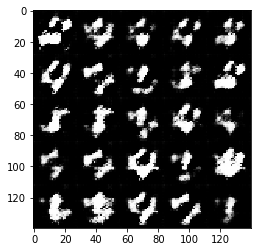

Epoch 1/2.	 Discriminator Loss: 0.7359;  Generator Loss: 2.2699
Epoch 1/2.	 Discriminator Loss: 1.5629;  Generator Loss: 0.4411
Epoch 1/2.	 Discriminator Loss: 0.6642;  Generator Loss: 2.0026
Epoch 1/2.	 Discriminator Loss: 0.7697;  Generator Loss: 2.3224
Epoch 1/2.	 Discriminator Loss: 1.1724;  Generator Loss: 0.8785
Epoch 1/2.	 Discriminator Loss: 0.7983;  Generator Loss: 2.2082
Epoch 1/2.	 Discriminator Loss: 1.1963;  Generator Loss: 3.0683
Epoch 1/2.	 Discriminator Loss: 1.2367;  Generator Loss: 0.7088
Epoch 1/2.	 Discriminator Loss: 0.7774;  Generator Loss: 2.1092
Epoch 1/2.	 Discriminator Loss: 0.8571;  Generator Loss: 0.9105


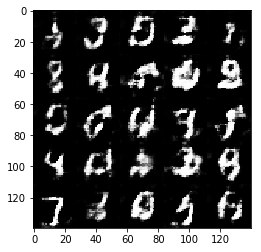

Epoch 1/2.	 Discriminator Loss: 1.0605;  Generator Loss: 0.7784
Epoch 1/2.	 Discriminator Loss: 0.9022;  Generator Loss: 1.1804
Epoch 1/2.	 Discriminator Loss: 0.7989;  Generator Loss: 2.0695
Epoch 1/2.	 Discriminator Loss: 1.1309;  Generator Loss: 0.9673
Epoch 1/2.	 Discriminator Loss: 1.2274;  Generator Loss: 0.7096
Epoch 1/2.	 Discriminator Loss: 0.8136;  Generator Loss: 1.4550
Epoch 1/2.	 Discriminator Loss: 1.2116;  Generator Loss: 0.5423
Epoch 1/2.	 Discriminator Loss: 1.1934;  Generator Loss: 0.5935
Epoch 1/2.	 Discriminator Loss: 0.9123;  Generator Loss: 1.7857
Epoch 1/2.	 Discriminator Loss: 0.9391;  Generator Loss: 1.0762


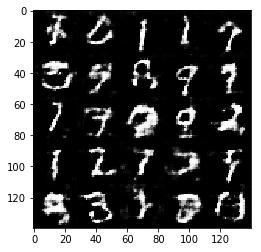

Epoch 1/2.	 Discriminator Loss: 0.9513;  Generator Loss: 0.8273
Epoch 1/2.	 Discriminator Loss: 1.1213;  Generator Loss: 1.4542
Epoch 1/2.	 Discriminator Loss: 1.6962;  Generator Loss: 0.2802
Epoch 1/2.	 Discriminator Loss: 1.3979;  Generator Loss: 0.4085
Epoch 1/2.	 Discriminator Loss: 1.2808;  Generator Loss: 0.4594
Epoch 1/2.	 Discriminator Loss: 1.6161;  Generator Loss: 0.2978
Epoch 1/2.	 Discriminator Loss: 1.2634;  Generator Loss: 0.4966
Epoch 1/2.	 Discriminator Loss: 0.8647;  Generator Loss: 1.3943
Epoch 1/2.	 Discriminator Loss: 0.8315;  Generator Loss: 1.1276
Epoch 1/2.	 Discriminator Loss: 1.4864;  Generator Loss: 0.3892


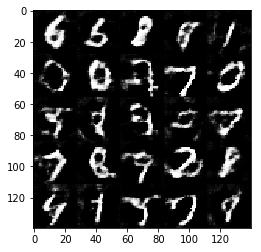

Epoch 1/2.	 Discriminator Loss: 1.2607;  Generator Loss: 0.4722
Epoch 1/2.	 Discriminator Loss: 1.5697;  Generator Loss: 0.3459
Epoch 1/2.	 Discriminator Loss: 1.2799;  Generator Loss: 0.4286
Epoch 1/2.	 Discriminator Loss: 1.3090;  Generator Loss: 0.4581
Epoch 1/2.	 Discriminator Loss: 0.9251;  Generator Loss: 1.1097
Epoch 1/2.	 Discriminator Loss: 1.0096;  Generator Loss: 1.4913
Epoch 1/2.	 Discriminator Loss: 0.7963;  Generator Loss: 1.4509
Epoch 1/2.	 Discriminator Loss: 1.4449;  Generator Loss: 0.4234
Epoch 1/2.	 Discriminator Loss: 1.4286;  Generator Loss: 2.3042
Epoch 1/2.	 Discriminator Loss: 1.3433;  Generator Loss: 0.4377


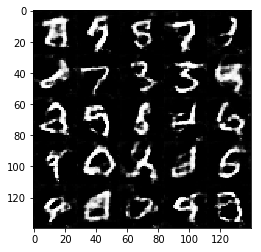

Epoch 1/2.	 Discriminator Loss: 1.0381;  Generator Loss: 0.6656
Epoch 1/2.	 Discriminator Loss: 1.3756;  Generator Loss: 0.4491
Epoch 1/2.	 Discriminator Loss: 1.4319;  Generator Loss: 0.3669
Epoch 1/2.	 Discriminator Loss: 0.9945;  Generator Loss: 0.7176
Epoch 1/2.	 Discriminator Loss: 1.3711;  Generator Loss: 0.3995
Epoch 1/2.	 Discriminator Loss: 0.9290;  Generator Loss: 1.2923
Epoch 1/2.	 Discriminator Loss: 1.3157;  Generator Loss: 0.4798
Epoch 1/2.	 Discriminator Loss: 1.3834;  Generator Loss: 2.4981
Epoch 1/2.	 Discriminator Loss: 1.1589;  Generator Loss: 1.8414
Epoch 1/2.	 Discriminator Loss: 0.9423;  Generator Loss: 0.9939


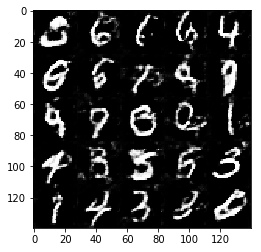

Epoch 1/2.	 Discriminator Loss: 0.8470;  Generator Loss: 1.1919
Epoch 1/2.	 Discriminator Loss: 0.8192;  Generator Loss: 1.2128
Epoch 1/2.	 Discriminator Loss: 0.9614;  Generator Loss: 0.9644
Epoch 1/2.	 Discriminator Loss: 1.2028;  Generator Loss: 0.6273
Epoch 1/2.	 Discriminator Loss: 1.2457;  Generator Loss: 0.5172
Epoch 1/2.	 Discriminator Loss: 1.1813;  Generator Loss: 0.7156
Epoch 1/2.	 Discriminator Loss: 1.8361;  Generator Loss: 0.2439
Epoch 1/2.	 Discriminator Loss: 1.0992;  Generator Loss: 1.0144
Epoch 1/2.	 Discriminator Loss: 0.9117;  Generator Loss: 1.0439
Epoch 1/2.	 Discriminator Loss: 1.2311;  Generator Loss: 0.5359


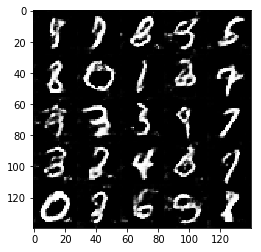

Epoch 1/2.	 Discriminator Loss: 1.2617;  Generator Loss: 1.2557
Epoch 1/2.	 Discriminator Loss: 1.0696;  Generator Loss: 1.6682
Epoch 1/2.	 Discriminator Loss: 0.8614;  Generator Loss: 1.1722
Epoch 1/2.	 Discriminator Loss: 1.2854;  Generator Loss: 0.5299
Epoch 1/2.	 Discriminator Loss: 1.1301;  Generator Loss: 0.5980
Epoch 1/2.	 Discriminator Loss: 1.7760;  Generator Loss: 0.2418
Epoch 1/2.	 Discriminator Loss: 1.1673;  Generator Loss: 0.5848
Epoch 1/2.	 Discriminator Loss: 2.2255;  Generator Loss: 3.2840
Epoch 1/2.	 Discriminator Loss: 1.0846;  Generator Loss: 0.5824
Epoch 1/2.	 Discriminator Loss: 0.7970;  Generator Loss: 1.0271


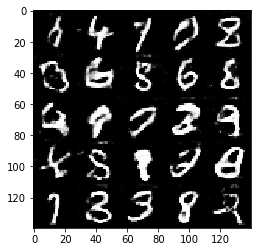

Epoch 1/2.	 Discriminator Loss: 1.5566;  Generator Loss: 0.4014
Epoch 1/2.	 Discriminator Loss: 2.6260;  Generator Loss: 0.1127
Epoch 1/2.	 Discriminator Loss: 1.4439;  Generator Loss: 1.8368
Epoch 2/2.	 Discriminator Loss: 1.2412;  Generator Loss: 1.3683
Epoch 2/2.	 Discriminator Loss: 1.0666;  Generator Loss: 0.6871
Epoch 2/2.	 Discriminator Loss: 1.0801;  Generator Loss: 0.6770
Epoch 2/2.	 Discriminator Loss: 0.9812;  Generator Loss: 1.2272
Epoch 2/2.	 Discriminator Loss: 1.3701;  Generator Loss: 0.4226
Epoch 2/2.	 Discriminator Loss: 1.3875;  Generator Loss: 0.4193
Epoch 2/2.	 Discriminator Loss: 1.2304;  Generator Loss: 0.4997


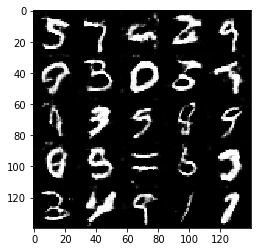

Epoch 2/2.	 Discriminator Loss: 0.9854;  Generator Loss: 1.6120
Epoch 2/2.	 Discriminator Loss: 1.1018;  Generator Loss: 0.6734
Epoch 2/2.	 Discriminator Loss: 1.4022;  Generator Loss: 0.3994
Epoch 2/2.	 Discriminator Loss: 1.0450;  Generator Loss: 0.8250
Epoch 2/2.	 Discriminator Loss: 0.9304;  Generator Loss: 0.9663
Epoch 2/2.	 Discriminator Loss: 1.4439;  Generator Loss: 0.3805
Epoch 2/2.	 Discriminator Loss: 2.1801;  Generator Loss: 0.1740
Epoch 2/2.	 Discriminator Loss: 1.2791;  Generator Loss: 0.4480
Epoch 2/2.	 Discriminator Loss: 0.7653;  Generator Loss: 1.3540
Epoch 2/2.	 Discriminator Loss: 0.9142;  Generator Loss: 0.7627


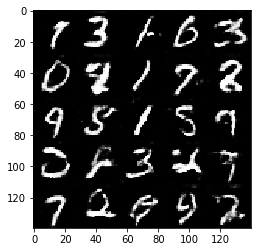

Epoch 2/2.	 Discriminator Loss: 0.9141;  Generator Loss: 1.1541
Epoch 2/2.	 Discriminator Loss: 1.0268;  Generator Loss: 0.6419
Epoch 2/2.	 Discriminator Loss: 1.9609;  Generator Loss: 0.2236
Epoch 2/2.	 Discriminator Loss: 1.8318;  Generator Loss: 0.2311
Epoch 2/2.	 Discriminator Loss: 0.8075;  Generator Loss: 1.0873
Epoch 2/2.	 Discriminator Loss: 1.2422;  Generator Loss: 0.5150
Epoch 2/2.	 Discriminator Loss: 0.7676;  Generator Loss: 1.5609
Epoch 2/2.	 Discriminator Loss: 2.0592;  Generator Loss: 5.1493
Epoch 2/2.	 Discriminator Loss: 0.9892;  Generator Loss: 0.7979
Epoch 2/2.	 Discriminator Loss: 0.7220;  Generator Loss: 1.9198


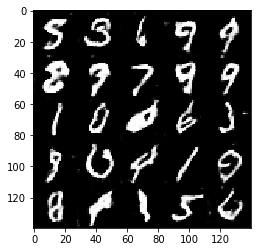

Epoch 2/2.	 Discriminator Loss: 0.6470;  Generator Loss: 1.2614
Epoch 2/2.	 Discriminator Loss: 1.0209;  Generator Loss: 0.7679
Epoch 2/2.	 Discriminator Loss: 2.6738;  Generator Loss: 0.1366
Epoch 2/2.	 Discriminator Loss: 0.9669;  Generator Loss: 0.8305
Epoch 2/2.	 Discriminator Loss: 1.2422;  Generator Loss: 0.4908
Epoch 2/2.	 Discriminator Loss: 0.9618;  Generator Loss: 0.6627
Epoch 2/2.	 Discriminator Loss: 1.3163;  Generator Loss: 1.8762
Epoch 2/2.	 Discriminator Loss: 0.7461;  Generator Loss: 1.1359
Epoch 2/2.	 Discriminator Loss: 0.9719;  Generator Loss: 0.8117
Epoch 2/2.	 Discriminator Loss: 0.7401;  Generator Loss: 1.3507


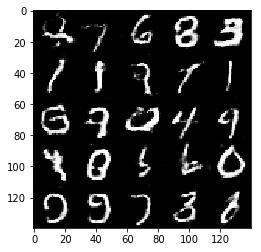

Epoch 2/2.	 Discriminator Loss: 1.8073;  Generator Loss: 0.2647
Epoch 2/2.	 Discriminator Loss: 1.1606;  Generator Loss: 0.5839
Epoch 2/2.	 Discriminator Loss: 0.6853;  Generator Loss: 1.1704
Epoch 2/2.	 Discriminator Loss: 0.4664;  Generator Loss: 1.4965
Epoch 2/2.	 Discriminator Loss: 0.7087;  Generator Loss: 1.0737
Epoch 2/2.	 Discriminator Loss: 0.6587;  Generator Loss: 1.1135
Epoch 2/2.	 Discriminator Loss: 0.7858;  Generator Loss: 1.6463
Epoch 2/2.	 Discriminator Loss: 1.1374;  Generator Loss: 0.5720
Epoch 2/2.	 Discriminator Loss: 0.6920;  Generator Loss: 1.8491
Epoch 2/2.	 Discriminator Loss: 0.9325;  Generator Loss: 0.7643


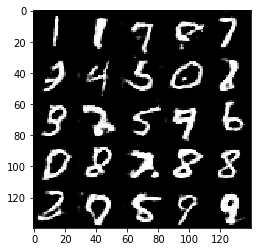

Epoch 2/2.	 Discriminator Loss: 0.6864;  Generator Loss: 1.6857
Epoch 2/2.	 Discriminator Loss: 0.3987;  Generator Loss: 1.9752
Epoch 2/2.	 Discriminator Loss: 0.6348;  Generator Loss: 1.1443
Epoch 2/2.	 Discriminator Loss: 1.1475;  Generator Loss: 0.5645
Epoch 2/2.	 Discriminator Loss: 1.8495;  Generator Loss: 2.6793
Epoch 2/2.	 Discriminator Loss: 0.7739;  Generator Loss: 1.1853
Epoch 2/2.	 Discriminator Loss: 0.7761;  Generator Loss: 1.4095
Epoch 2/2.	 Discriminator Loss: 1.0963;  Generator Loss: 2.6919
Epoch 2/2.	 Discriminator Loss: 1.2719;  Generator Loss: 0.4988
Epoch 2/2.	 Discriminator Loss: 0.8958;  Generator Loss: 1.0687


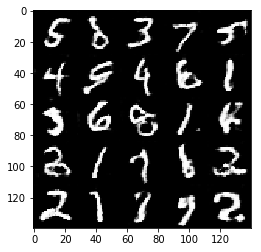

Epoch 2/2.	 Discriminator Loss: 1.1049;  Generator Loss: 0.5567
Epoch 2/2.	 Discriminator Loss: 1.6029;  Generator Loss: 0.3954
Epoch 2/2.	 Discriminator Loss: 2.0523;  Generator Loss: 3.8084
Epoch 2/2.	 Discriminator Loss: 0.9164;  Generator Loss: 0.8424
Epoch 2/2.	 Discriminator Loss: 0.8981;  Generator Loss: 0.8083
Epoch 2/2.	 Discriminator Loss: 0.9869;  Generator Loss: 2.8321
Epoch 2/2.	 Discriminator Loss: 0.7220;  Generator Loss: 1.3569
Epoch 2/2.	 Discriminator Loss: 0.7247;  Generator Loss: 1.0440
Epoch 2/2.	 Discriminator Loss: 0.4452;  Generator Loss: 1.8159
Epoch 2/2.	 Discriminator Loss: 0.7375;  Generator Loss: 0.9317


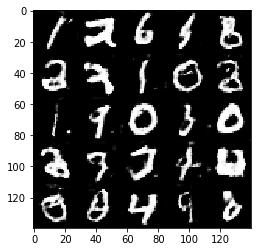

Epoch 2/2.	 Discriminator Loss: 0.9587;  Generator Loss: 0.7514
Epoch 2/2.	 Discriminator Loss: 1.0793;  Generator Loss: 0.6651
Epoch 2/2.	 Discriminator Loss: 0.7947;  Generator Loss: 0.8798
Epoch 2/2.	 Discriminator Loss: 0.4381;  Generator Loss: 1.5483
Epoch 2/2.	 Discriminator Loss: 1.0596;  Generator Loss: 2.8956
Epoch 2/2.	 Discriminator Loss: 0.5249;  Generator Loss: 1.2629
Epoch 2/2.	 Discriminator Loss: 0.3400;  Generator Loss: 2.1694
Epoch 2/2.	 Discriminator Loss: 0.8417;  Generator Loss: 0.7889
Epoch 2/2.	 Discriminator Loss: 0.5014;  Generator Loss: 1.4579
Epoch 2/2.	 Discriminator Loss: 4.6741;  Generator Loss: 7.6163


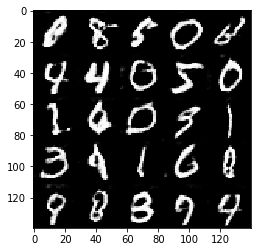

Epoch 2/2.	 Discriminator Loss: 0.6614;  Generator Loss: 1.4388
Epoch 2/2.	 Discriminator Loss: 0.6990;  Generator Loss: 1.4431
Epoch 2/2.	 Discriminator Loss: 1.6221;  Generator Loss: 0.4501
Epoch 2/2.	 Discriminator Loss: 0.9270;  Generator Loss: 0.8328
Epoch 2/2.	 Discriminator Loss: 0.4087;  Generator Loss: 2.6821
Epoch 2/2.	 Discriminator Loss: 0.4404;  Generator Loss: 1.6369
Epoch 2/2.	 Discriminator Loss: 0.6500;  Generator Loss: 1.0315
Epoch 2/2.	 Discriminator Loss: 0.8372;  Generator Loss: 0.8438
Epoch 2/2.	 Discriminator Loss: 0.7447;  Generator Loss: 0.8696
Epoch 2/2.	 Discriminator Loss: 1.3631;  Generator Loss: 3.5774


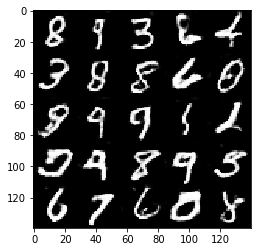

Epoch 2/2.	 Discriminator Loss: 1.3448;  Generator Loss: 0.5721
Epoch 2/2.	 Discriminator Loss: 0.4538;  Generator Loss: 1.5853
Epoch 2/2.	 Discriminator Loss: 2.9936;  Generator Loss: 0.1307
Epoch 2/2.	 Discriminator Loss: 0.8018;  Generator Loss: 1.5721
Epoch 2/2.	 Discriminator Loss: 0.9004;  Generator Loss: 0.7332
Epoch 2/2.	 Discriminator Loss: 0.2968;  Generator Loss: 2.3387
Epoch 2/2.	 Discriminator Loss: 0.5657;  Generator Loss: 1.3140


In [16]:
batch_size = 64
z_dim = 128
learning_rate = 0.001
beta1 = 0.35


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1.	 Discriminator Loss: 11.0719;  Generator Loss: 0.0000
Epoch 1/1.	 Discriminator Loss: 0.1809;  Generator Loss: 13.7117
Epoch 1/1.	 Discriminator Loss: 0.7241;  Generator Loss: 0.8648
Epoch 1/1.	 Discriminator Loss: 2.7689;  Generator Loss: 4.2310
Epoch 1/1.	 Discriminator Loss: 1.1317;  Generator Loss: 0.7501
Epoch 1/1.	 Discriminator Loss: 1.2404;  Generator Loss: 3.9456
Epoch 1/1.	 Discriminator Loss: 0.2317;  Generator Loss: 2.8961
Epoch 1/1.	 Discriminator Loss: 0.9090;  Generator Loss: 3.2548
Epoch 1/1.	 Discriminator Loss: 2.3704;  Generator Loss: 6.8052
Epoch 1/1.	 Discriminator Loss: 0.9269;  Generator Loss: 3.0032


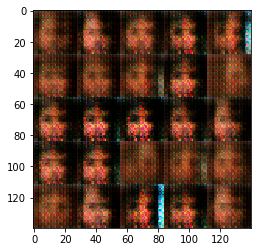

Epoch 1/1.	 Discriminator Loss: 0.9213;  Generator Loss: 0.9945
Epoch 1/1.	 Discriminator Loss: 0.9312;  Generator Loss: 1.7420
Epoch 1/1.	 Discriminator Loss: 1.8788;  Generator Loss: 0.3513
Epoch 1/1.	 Discriminator Loss: 1.4322;  Generator Loss: 0.8031
Epoch 1/1.	 Discriminator Loss: 1.3171;  Generator Loss: 0.7596
Epoch 1/1.	 Discriminator Loss: 2.3343;  Generator Loss: 0.1407
Epoch 1/1.	 Discriminator Loss: 0.8020;  Generator Loss: 1.1563
Epoch 1/1.	 Discriminator Loss: 1.2367;  Generator Loss: 0.8051
Epoch 1/1.	 Discriminator Loss: 1.1123;  Generator Loss: 1.3778
Epoch 1/1.	 Discriminator Loss: 1.3109;  Generator Loss: 0.6965


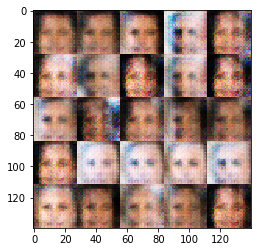

Epoch 1/1.	 Discriminator Loss: 0.6542;  Generator Loss: 1.3723
Epoch 1/1.	 Discriminator Loss: 1.2319;  Generator Loss: 0.8378
Epoch 1/1.	 Discriminator Loss: 1.2683;  Generator Loss: 0.8813
Epoch 1/1.	 Discriminator Loss: 1.2716;  Generator Loss: 0.6701
Epoch 1/1.	 Discriminator Loss: 1.3258;  Generator Loss: 0.7995
Epoch 1/1.	 Discriminator Loss: 1.4124;  Generator Loss: 0.7422
Epoch 1/1.	 Discriminator Loss: 1.1431;  Generator Loss: 0.7124
Epoch 1/1.	 Discriminator Loss: 1.0921;  Generator Loss: 0.6908
Epoch 1/1.	 Discriminator Loss: 0.9855;  Generator Loss: 1.2568
Epoch 1/1.	 Discriminator Loss: 0.6756;  Generator Loss: 1.1415


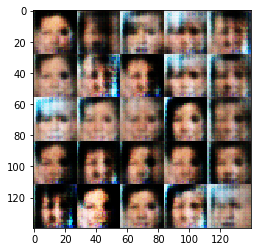

Epoch 1/1.	 Discriminator Loss: 1.1960;  Generator Loss: 0.8137
Epoch 1/1.	 Discriminator Loss: 1.1571;  Generator Loss: 0.7872
Epoch 1/1.	 Discriminator Loss: 1.0937;  Generator Loss: 0.8685
Epoch 1/1.	 Discriminator Loss: 1.2031;  Generator Loss: 1.3042
Epoch 1/1.	 Discriminator Loss: 1.2244;  Generator Loss: 1.0929
Epoch 1/1.	 Discriminator Loss: 0.5630;  Generator Loss: 2.6067
Epoch 1/1.	 Discriminator Loss: 1.2805;  Generator Loss: 0.4205
Epoch 1/1.	 Discriminator Loss: 1.4753;  Generator Loss: 0.6136
Epoch 1/1.	 Discriminator Loss: 1.3909;  Generator Loss: 1.0506
Epoch 1/1.	 Discriminator Loss: 1.4605;  Generator Loss: 0.4088


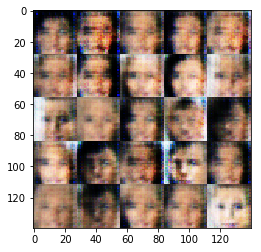

Epoch 1/1.	 Discriminator Loss: 0.9618;  Generator Loss: 0.9964
Epoch 1/1.	 Discriminator Loss: 0.9443;  Generator Loss: 0.7633
Epoch 1/1.	 Discriminator Loss: 1.3611;  Generator Loss: 1.2908
Epoch 1/1.	 Discriminator Loss: 1.2251;  Generator Loss: 0.7543
Epoch 1/1.	 Discriminator Loss: 1.0332;  Generator Loss: 0.8789
Epoch 1/1.	 Discriminator Loss: 1.2102;  Generator Loss: 0.7307
Epoch 1/1.	 Discriminator Loss: 1.2236;  Generator Loss: 0.8805
Epoch 1/1.	 Discriminator Loss: 1.3041;  Generator Loss: 4.1584
Epoch 1/1.	 Discriminator Loss: 1.2134;  Generator Loss: 0.8588
Epoch 1/1.	 Discriminator Loss: 1.9995;  Generator Loss: 3.0016


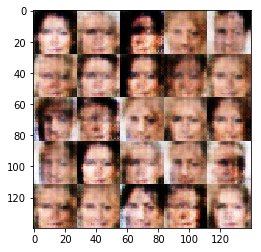

Epoch 1/1.	 Discriminator Loss: 0.9924;  Generator Loss: 0.7925
Epoch 1/1.	 Discriminator Loss: 0.9899;  Generator Loss: 0.7821
Epoch 1/1.	 Discriminator Loss: 1.1766;  Generator Loss: 0.5834
Epoch 1/1.	 Discriminator Loss: 0.9660;  Generator Loss: 1.0511
Epoch 1/1.	 Discriminator Loss: 0.8890;  Generator Loss: 0.9895
Epoch 1/1.	 Discriminator Loss: 1.2561;  Generator Loss: 0.8834
Epoch 1/1.	 Discriminator Loss: 0.8309;  Generator Loss: 1.0794
Epoch 1/1.	 Discriminator Loss: 1.4729;  Generator Loss: 0.8456
Epoch 1/1.	 Discriminator Loss: 1.0606;  Generator Loss: 0.7457
Epoch 1/1.	 Discriminator Loss: 1.1616;  Generator Loss: 0.8630


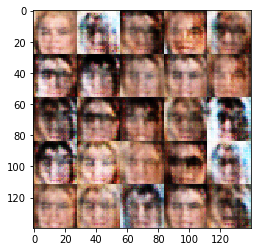

Epoch 1/1.	 Discriminator Loss: 1.2945;  Generator Loss: 0.7760
Epoch 1/1.	 Discriminator Loss: 0.9125;  Generator Loss: 1.2284
Epoch 1/1.	 Discriminator Loss: 1.1629;  Generator Loss: 1.5989
Epoch 1/1.	 Discriminator Loss: 0.7615;  Generator Loss: 1.0861
Epoch 1/1.	 Discriminator Loss: 1.6492;  Generator Loss: 0.4298
Epoch 1/1.	 Discriminator Loss: 0.8902;  Generator Loss: 1.0356
Epoch 1/1.	 Discriminator Loss: 1.2718;  Generator Loss: 0.6556
Epoch 1/1.	 Discriminator Loss: 1.3469;  Generator Loss: 1.5788
Epoch 1/1.	 Discriminator Loss: 1.2434;  Generator Loss: 0.8576
Epoch 1/1.	 Discriminator Loss: 1.3225;  Generator Loss: 0.4585


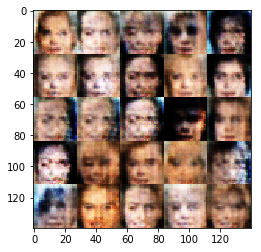

Epoch 1/1.	 Discriminator Loss: 1.1263;  Generator Loss: 0.6237
Epoch 1/1.	 Discriminator Loss: 1.2561;  Generator Loss: 0.9457
Epoch 1/1.	 Discriminator Loss: 1.4407;  Generator Loss: 1.0477
Epoch 1/1.	 Discriminator Loss: 0.8774;  Generator Loss: 1.2934
Epoch 1/1.	 Discriminator Loss: 1.1628;  Generator Loss: 0.9610
Epoch 1/1.	 Discriminator Loss: 1.3958;  Generator Loss: 0.4728
Epoch 1/1.	 Discriminator Loss: 1.1920;  Generator Loss: 0.5500
Epoch 1/1.	 Discriminator Loss: 1.1287;  Generator Loss: 1.0143
Epoch 1/1.	 Discriminator Loss: 1.4594;  Generator Loss: 0.5871
Epoch 1/1.	 Discriminator Loss: 1.7732;  Generator Loss: 0.2667


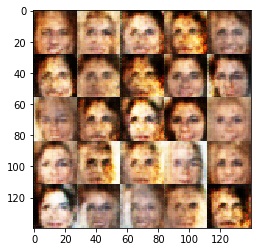

Epoch 1/1.	 Discriminator Loss: 1.2532;  Generator Loss: 0.6639
Epoch 1/1.	 Discriminator Loss: 1.0422;  Generator Loss: 0.7359
Epoch 1/1.	 Discriminator Loss: 0.8346;  Generator Loss: 1.3083
Epoch 1/1.	 Discriminator Loss: 1.3736;  Generator Loss: 0.4015
Epoch 1/1.	 Discriminator Loss: 0.9766;  Generator Loss: 1.2523
Epoch 1/1.	 Discriminator Loss: 1.2975;  Generator Loss: 1.2309
Epoch 1/1.	 Discriminator Loss: 1.0460;  Generator Loss: 0.6649
Epoch 1/1.	 Discriminator Loss: 1.2404;  Generator Loss: 0.6686
Epoch 1/1.	 Discriminator Loss: 1.0343;  Generator Loss: 1.0549
Epoch 1/1.	 Discriminator Loss: 1.1273;  Generator Loss: 0.7028


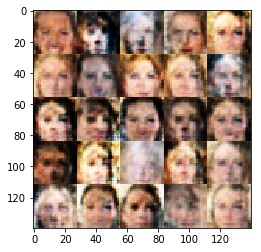

Epoch 1/1.	 Discriminator Loss: 1.8035;  Generator Loss: 0.2713
Epoch 1/1.	 Discriminator Loss: 1.1151;  Generator Loss: 0.5201
Epoch 1/1.	 Discriminator Loss: 1.2860;  Generator Loss: 0.7344
Epoch 1/1.	 Discriminator Loss: 1.2724;  Generator Loss: 0.5308
Epoch 1/1.	 Discriminator Loss: 1.2810;  Generator Loss: 1.6537
Epoch 1/1.	 Discriminator Loss: 0.9448;  Generator Loss: 0.8691
Epoch 1/1.	 Discriminator Loss: 1.1302;  Generator Loss: 0.8401
Epoch 1/1.	 Discriminator Loss: 1.1092;  Generator Loss: 0.7566
Epoch 1/1.	 Discriminator Loss: 1.3276;  Generator Loss: 0.8224
Epoch 1/1.	 Discriminator Loss: 1.5549;  Generator Loss: 2.2385


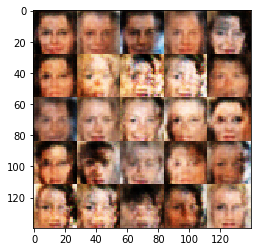

Epoch 1/1.	 Discriminator Loss: 1.1162;  Generator Loss: 1.0398
Epoch 1/1.	 Discriminator Loss: 1.0367;  Generator Loss: 1.3195
Epoch 1/1.	 Discriminator Loss: 1.3081;  Generator Loss: 1.0694
Epoch 1/1.	 Discriminator Loss: 1.0647;  Generator Loss: 1.1898
Epoch 1/1.	 Discriminator Loss: 0.9817;  Generator Loss: 0.8538
Epoch 1/1.	 Discriminator Loss: 1.0288;  Generator Loss: 1.0198
Epoch 1/1.	 Discriminator Loss: 1.8780;  Generator Loss: 2.7795
Epoch 1/1.	 Discriminator Loss: 1.0029;  Generator Loss: 1.0647
Epoch 1/1.	 Discriminator Loss: 0.9929;  Generator Loss: 0.9433
Epoch 1/1.	 Discriminator Loss: 1.1178;  Generator Loss: 1.1385


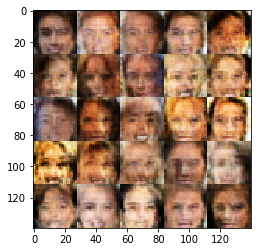

Epoch 1/1.	 Discriminator Loss: 1.0045;  Generator Loss: 0.8406
Epoch 1/1.	 Discriminator Loss: 1.1083;  Generator Loss: 1.2803
Epoch 1/1.	 Discriminator Loss: 1.4811;  Generator Loss: 2.1393
Epoch 1/1.	 Discriminator Loss: 1.1326;  Generator Loss: 1.3030
Epoch 1/1.	 Discriminator Loss: 1.2625;  Generator Loss: 0.8748
Epoch 1/1.	 Discriminator Loss: 1.3080;  Generator Loss: 0.4786
Epoch 1/1.	 Discriminator Loss: 1.4742;  Generator Loss: 1.8347
Epoch 1/1.	 Discriminator Loss: 1.0230;  Generator Loss: 1.0196
Epoch 1/1.	 Discriminator Loss: 1.2681;  Generator Loss: 1.3532
Epoch 1/1.	 Discriminator Loss: 1.4587;  Generator Loss: 1.4553


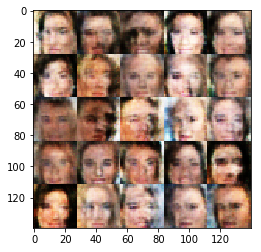

Epoch 1/1.	 Discriminator Loss: 1.2503;  Generator Loss: 0.8375
Epoch 1/1.	 Discriminator Loss: 0.9689;  Generator Loss: 1.3033
Epoch 1/1.	 Discriminator Loss: 1.3319;  Generator Loss: 1.5155
Epoch 1/1.	 Discriminator Loss: 1.0320;  Generator Loss: 1.0025
Epoch 1/1.	 Discriminator Loss: 1.0790;  Generator Loss: 0.8434
Epoch 1/1.	 Discriminator Loss: 1.0627;  Generator Loss: 1.2283
Epoch 1/1.	 Discriminator Loss: 1.9980;  Generator Loss: 1.9617
Epoch 1/1.	 Discriminator Loss: 1.1712;  Generator Loss: 0.6915
Epoch 1/1.	 Discriminator Loss: 1.7525;  Generator Loss: 0.4137
Epoch 1/1.	 Discriminator Loss: 1.0638;  Generator Loss: 0.7608


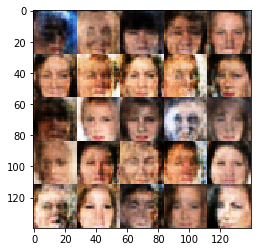

Epoch 1/1.	 Discriminator Loss: 1.3392;  Generator Loss: 0.4177
Epoch 1/1.	 Discriminator Loss: 1.1815;  Generator Loss: 0.5588
Epoch 1/1.	 Discriminator Loss: 0.9410;  Generator Loss: 0.8784
Epoch 1/1.	 Discriminator Loss: 1.2407;  Generator Loss: 1.3545
Epoch 1/1.	 Discriminator Loss: 1.1030;  Generator Loss: 0.7459
Epoch 1/1.	 Discriminator Loss: 1.1632;  Generator Loss: 0.5191
Epoch 1/1.	 Discriminator Loss: 1.2360;  Generator Loss: 0.5311
Epoch 1/1.	 Discriminator Loss: 1.1510;  Generator Loss: 0.6685
Epoch 1/1.	 Discriminator Loss: 1.7495;  Generator Loss: 0.2717
Epoch 1/1.	 Discriminator Loss: 1.0986;  Generator Loss: 1.4257


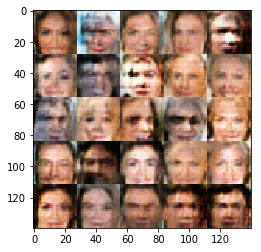

Epoch 1/1.	 Discriminator Loss: 1.4295;  Generator Loss: 0.3953
Epoch 1/1.	 Discriminator Loss: 1.0302;  Generator Loss: 0.6940
Epoch 1/1.	 Discriminator Loss: 1.6923;  Generator Loss: 0.2386
Epoch 1/1.	 Discriminator Loss: 1.3483;  Generator Loss: 0.6849
Epoch 1/1.	 Discriminator Loss: 1.0857;  Generator Loss: 1.2238
Epoch 1/1.	 Discriminator Loss: 1.0855;  Generator Loss: 0.6973
Epoch 1/1.	 Discriminator Loss: 1.1451;  Generator Loss: 0.8985
Epoch 1/1.	 Discriminator Loss: 1.1212;  Generator Loss: 0.8419
Epoch 1/1.	 Discriminator Loss: 1.5036;  Generator Loss: 0.5686
Epoch 1/1.	 Discriminator Loss: 0.9779;  Generator Loss: 0.9881


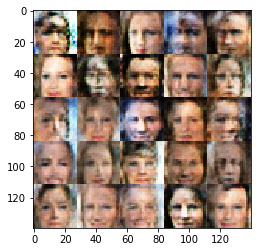

Epoch 1/1.	 Discriminator Loss: 1.0915;  Generator Loss: 0.7564
Epoch 1/1.	 Discriminator Loss: 1.5329;  Generator Loss: 0.4789
Epoch 1/1.	 Discriminator Loss: 1.3355;  Generator Loss: 0.6604
Epoch 1/1.	 Discriminator Loss: 0.9310;  Generator Loss: 1.3956
Epoch 1/1.	 Discriminator Loss: 1.3089;  Generator Loss: 1.6942
Epoch 1/1.	 Discriminator Loss: 1.2533;  Generator Loss: 0.6339
Epoch 1/1.	 Discriminator Loss: 0.9779;  Generator Loss: 0.9929
Epoch 1/1.	 Discriminator Loss: 1.0570;  Generator Loss: 0.7428
Epoch 1/1.	 Discriminator Loss: 1.1565;  Generator Loss: 1.2418
Epoch 1/1.	 Discriminator Loss: 1.1220;  Generator Loss: 0.6552


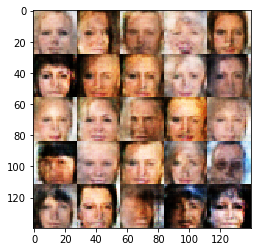

Epoch 1/1.	 Discriminator Loss: 1.9693;  Generator Loss: 0.1841
Epoch 1/1.	 Discriminator Loss: 1.1415;  Generator Loss: 0.6121
Epoch 1/1.	 Discriminator Loss: 0.8253;  Generator Loss: 0.9818
Epoch 1/1.	 Discriminator Loss: 1.2476;  Generator Loss: 0.6872
Epoch 1/1.	 Discriminator Loss: 1.1363;  Generator Loss: 0.6583
Epoch 1/1.	 Discriminator Loss: 1.3124;  Generator Loss: 1.3758
Epoch 1/1.	 Discriminator Loss: 1.1765;  Generator Loss: 0.9567
Epoch 1/1.	 Discriminator Loss: 0.9274;  Generator Loss: 1.0857
Epoch 1/1.	 Discriminator Loss: 1.2029;  Generator Loss: 0.7965
Epoch 1/1.	 Discriminator Loss: 1.5353;  Generator Loss: 0.3250


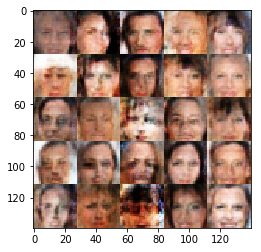

Epoch 1/1.	 Discriminator Loss: 1.2334;  Generator Loss: 0.7310
Epoch 1/1.	 Discriminator Loss: 1.1686;  Generator Loss: 0.9969
Epoch 1/1.	 Discriminator Loss: 1.2518;  Generator Loss: 0.5391
Epoch 1/1.	 Discriminator Loss: 1.0803;  Generator Loss: 1.1562
Epoch 1/1.	 Discriminator Loss: 0.9638;  Generator Loss: 0.9528
Epoch 1/1.	 Discriminator Loss: 1.0902;  Generator Loss: 0.8767
Epoch 1/1.	 Discriminator Loss: 1.1890;  Generator Loss: 0.8003
Epoch 1/1.	 Discriminator Loss: 0.9785;  Generator Loss: 1.2023
Epoch 1/1.	 Discriminator Loss: 1.1650;  Generator Loss: 0.6417
Epoch 1/1.	 Discriminator Loss: 1.0302;  Generator Loss: 0.9841


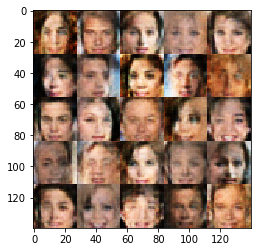

Epoch 1/1.	 Discriminator Loss: 1.0175;  Generator Loss: 0.8260
Epoch 1/1.	 Discriminator Loss: 1.6939;  Generator Loss: 0.2624
Epoch 1/1.	 Discriminator Loss: 1.0242;  Generator Loss: 0.7504
Epoch 1/1.	 Discriminator Loss: 0.9494;  Generator Loss: 0.8365
Epoch 1/1.	 Discriminator Loss: 1.0115;  Generator Loss: 1.0742
Epoch 1/1.	 Discriminator Loss: 0.8979;  Generator Loss: 0.7890
Epoch 1/1.	 Discriminator Loss: 1.3047;  Generator Loss: 0.6386
Epoch 1/1.	 Discriminator Loss: 1.2178;  Generator Loss: 0.8174
Epoch 1/1.	 Discriminator Loss: 0.9460;  Generator Loss: 0.7625
Epoch 1/1.	 Discriminator Loss: 1.2905;  Generator Loss: 0.5099


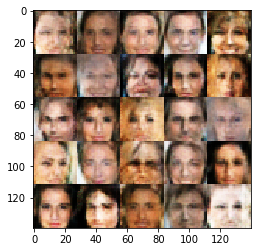

Epoch 1/1.	 Discriminator Loss: 1.1235;  Generator Loss: 0.7139
Epoch 1/1.	 Discriminator Loss: 1.2166;  Generator Loss: 1.7157
Epoch 1/1.	 Discriminator Loss: 1.3930;  Generator Loss: 0.3980
Epoch 1/1.	 Discriminator Loss: 0.9865;  Generator Loss: 1.4152
Epoch 1/1.	 Discriminator Loss: 1.1655;  Generator Loss: 0.6842
Epoch 1/1.	 Discriminator Loss: 1.0639;  Generator Loss: 0.8293
Epoch 1/1.	 Discriminator Loss: 1.1169;  Generator Loss: 1.0415
Epoch 1/1.	 Discriminator Loss: 1.1076;  Generator Loss: 0.7199
Epoch 1/1.	 Discriminator Loss: 0.9751;  Generator Loss: 0.8914
Epoch 1/1.	 Discriminator Loss: 1.1872;  Generator Loss: 0.5538


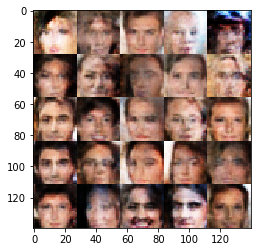

Epoch 1/1.	 Discriminator Loss: 2.0192;  Generator Loss: 0.1735
Epoch 1/1.	 Discriminator Loss: 0.9865;  Generator Loss: 1.4611
Epoch 1/1.	 Discriminator Loss: 0.9987;  Generator Loss: 0.9789
Epoch 1/1.	 Discriminator Loss: 1.3732;  Generator Loss: 1.7120
Epoch 1/1.	 Discriminator Loss: 0.9092;  Generator Loss: 1.0035
Epoch 1/1.	 Discriminator Loss: 1.1600;  Generator Loss: 0.9465
Epoch 1/1.	 Discriminator Loss: 1.4473;  Generator Loss: 1.6416
Epoch 1/1.	 Discriminator Loss: 1.4127;  Generator Loss: 0.4615
Epoch 1/1.	 Discriminator Loss: 1.0898;  Generator Loss: 0.9135
Epoch 1/1.	 Discriminator Loss: 1.0884;  Generator Loss: 1.5187


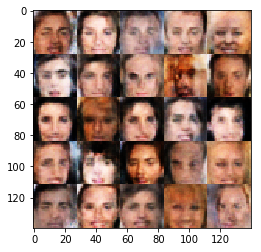

Epoch 1/1.	 Discriminator Loss: 1.3811;  Generator Loss: 0.4187
Epoch 1/1.	 Discriminator Loss: 1.5444;  Generator Loss: 0.3269
Epoch 1/1.	 Discriminator Loss: 1.7755;  Generator Loss: 0.2410
Epoch 1/1.	 Discriminator Loss: 0.8396;  Generator Loss: 1.3217
Epoch 1/1.	 Discriminator Loss: 1.7182;  Generator Loss: 0.2758
Epoch 1/1.	 Discriminator Loss: 0.8990;  Generator Loss: 1.1863
Epoch 1/1.	 Discriminator Loss: 1.1888;  Generator Loss: 0.6823
Epoch 1/1.	 Discriminator Loss: 1.2333;  Generator Loss: 0.6921
Epoch 1/1.	 Discriminator Loss: 1.4514;  Generator Loss: 0.3875
Epoch 1/1.	 Discriminator Loss: 1.2327;  Generator Loss: 0.5713


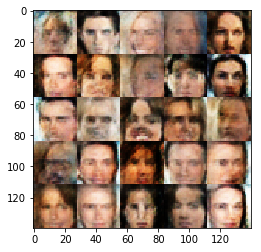

Epoch 1/1.	 Discriminator Loss: 1.0126;  Generator Loss: 1.2194
Epoch 1/1.	 Discriminator Loss: 1.1151;  Generator Loss: 1.1100
Epoch 1/1.	 Discriminator Loss: 1.2929;  Generator Loss: 0.4668
Epoch 1/1.	 Discriminator Loss: 1.0799;  Generator Loss: 0.9755
Epoch 1/1.	 Discriminator Loss: 1.2502;  Generator Loss: 0.4773
Epoch 1/1.	 Discriminator Loss: 1.0094;  Generator Loss: 0.9319
Epoch 1/1.	 Discriminator Loss: 1.1290;  Generator Loss: 0.6908
Epoch 1/1.	 Discriminator Loss: 1.0972;  Generator Loss: 0.6589
Epoch 1/1.	 Discriminator Loss: 0.9728;  Generator Loss: 1.4262
Epoch 1/1.	 Discriminator Loss: 1.3560;  Generator Loss: 0.4232


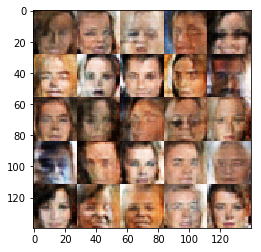

Epoch 1/1.	 Discriminator Loss: 1.1531;  Generator Loss: 0.7972
Epoch 1/1.	 Discriminator Loss: 1.1903;  Generator Loss: 0.7811
Epoch 1/1.	 Discriminator Loss: 1.5503;  Generator Loss: 0.3278
Epoch 1/1.	 Discriminator Loss: 1.4688;  Generator Loss: 0.3524
Epoch 1/1.	 Discriminator Loss: 1.4217;  Generator Loss: 0.3805
Epoch 1/1.	 Discriminator Loss: 1.0451;  Generator Loss: 0.7681
Epoch 1/1.	 Discriminator Loss: 1.2127;  Generator Loss: 1.6994
Epoch 1/1.	 Discriminator Loss: 1.3167;  Generator Loss: 0.7784
Epoch 1/1.	 Discriminator Loss: 1.0088;  Generator Loss: 1.2264
Epoch 1/1.	 Discriminator Loss: 1.0443;  Generator Loss: 0.8475


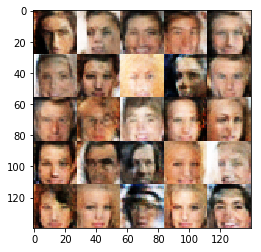

Epoch 1/1.	 Discriminator Loss: 1.0090;  Generator Loss: 1.0268
Epoch 1/1.	 Discriminator Loss: 1.5013;  Generator Loss: 0.3412
Epoch 1/1.	 Discriminator Loss: 1.2883;  Generator Loss: 1.2961
Epoch 1/1.	 Discriminator Loss: 0.9840;  Generator Loss: 1.1815
Epoch 1/1.	 Discriminator Loss: 1.3054;  Generator Loss: 0.4059
Epoch 1/1.	 Discriminator Loss: 1.3307;  Generator Loss: 0.4468
Epoch 1/1.	 Discriminator Loss: 1.1720;  Generator Loss: 1.5513
Epoch 1/1.	 Discriminator Loss: 1.5179;  Generator Loss: 0.3680
Epoch 1/1.	 Discriminator Loss: 0.9895;  Generator Loss: 0.7906
Epoch 1/1.	 Discriminator Loss: 1.4535;  Generator Loss: 0.4139


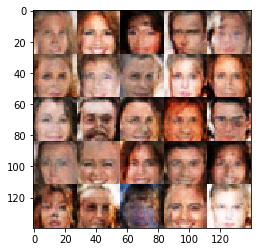

Epoch 1/1.	 Discriminator Loss: 1.4564;  Generator Loss: 1.8563
Epoch 1/1.	 Discriminator Loss: 1.3125;  Generator Loss: 0.6292
Epoch 1/1.	 Discriminator Loss: 1.5922;  Generator Loss: 0.3223
Epoch 1/1.	 Discriminator Loss: 1.5176;  Generator Loss: 0.3324
Epoch 1/1.	 Discriminator Loss: 0.8807;  Generator Loss: 1.1987
Epoch 1/1.	 Discriminator Loss: 0.8934;  Generator Loss: 1.2781
Epoch 1/1.	 Discriminator Loss: 1.6026;  Generator Loss: 0.3099
Epoch 1/1.	 Discriminator Loss: 1.3243;  Generator Loss: 1.6776
Epoch 1/1.	 Discriminator Loss: 1.2359;  Generator Loss: 0.4669
Epoch 1/1.	 Discriminator Loss: 1.3169;  Generator Loss: 0.5168


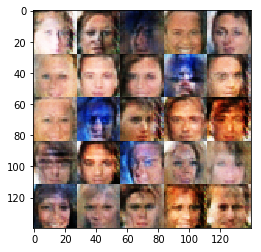

Epoch 1/1.	 Discriminator Loss: 1.3583;  Generator Loss: 1.4973
Epoch 1/1.	 Discriminator Loss: 0.8631;  Generator Loss: 1.1406
Epoch 1/1.	 Discriminator Loss: 1.0350;  Generator Loss: 0.8905
Epoch 1/1.	 Discriminator Loss: 1.2969;  Generator Loss: 0.4269
Epoch 1/1.	 Discriminator Loss: 1.1078;  Generator Loss: 0.9017
Epoch 1/1.	 Discriminator Loss: 1.3801;  Generator Loss: 0.4213
Epoch 1/1.	 Discriminator Loss: 2.2092;  Generator Loss: 2.0807
Epoch 1/1.	 Discriminator Loss: 1.2785;  Generator Loss: 0.5020
Epoch 1/1.	 Discriminator Loss: 0.9169;  Generator Loss: 0.9652
Epoch 1/1.	 Discriminator Loss: 1.6558;  Generator Loss: 0.2806


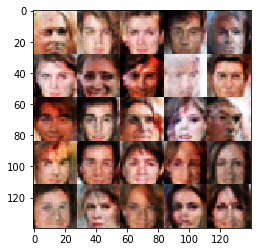

Epoch 1/1.	 Discriminator Loss: 1.1396;  Generator Loss: 1.6554
Epoch 1/1.	 Discriminator Loss: 1.3018;  Generator Loss: 0.4464
Epoch 1/1.	 Discriminator Loss: 1.5446;  Generator Loss: 0.5872
Epoch 1/1.	 Discriminator Loss: 1.6596;  Generator Loss: 0.2754
Epoch 1/1.	 Discriminator Loss: 1.2025;  Generator Loss: 0.5662
Epoch 1/1.	 Discriminator Loss: 1.1602;  Generator Loss: 1.2894
Epoch 1/1.	 Discriminator Loss: 1.0291;  Generator Loss: 0.7851
Epoch 1/1.	 Discriminator Loss: 1.0304;  Generator Loss: 2.0030
Epoch 1/1.	 Discriminator Loss: 0.7192;  Generator Loss: 1.1788
Epoch 1/1.	 Discriminator Loss: 1.2262;  Generator Loss: 0.5846


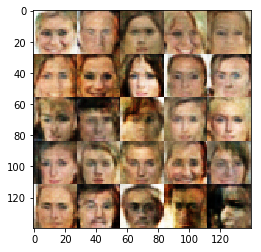

Epoch 1/1.	 Discriminator Loss: 1.5660;  Generator Loss: 0.3016
Epoch 1/1.	 Discriminator Loss: 1.0524;  Generator Loss: 1.9626
Epoch 1/1.	 Discriminator Loss: 1.2169;  Generator Loss: 1.0306
Epoch 1/1.	 Discriminator Loss: 0.7956;  Generator Loss: 0.9169
Epoch 1/1.	 Discriminator Loss: 1.1890;  Generator Loss: 1.0221
Epoch 1/1.	 Discriminator Loss: 1.6189;  Generator Loss: 1.8060
Epoch 1/1.	 Discriminator Loss: 0.9864;  Generator Loss: 0.9520
Epoch 1/1.	 Discriminator Loss: 1.4958;  Generator Loss: 0.3669
Epoch 1/1.	 Discriminator Loss: 1.2014;  Generator Loss: 0.5194
Epoch 1/1.	 Discriminator Loss: 0.9746;  Generator Loss: 0.9195


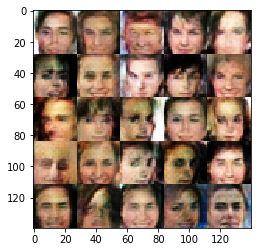

Epoch 1/1.	 Discriminator Loss: 1.1022;  Generator Loss: 0.7057
Epoch 1/1.	 Discriminator Loss: 1.7323;  Generator Loss: 2.0140
Epoch 1/1.	 Discriminator Loss: 1.1579;  Generator Loss: 1.6428
Epoch 1/1.	 Discriminator Loss: 1.1782;  Generator Loss: 0.6077
Epoch 1/1.	 Discriminator Loss: 1.4879;  Generator Loss: 0.3397
Epoch 1/1.	 Discriminator Loss: 1.0813;  Generator Loss: 0.6132
Epoch 1/1.	 Discriminator Loss: 1.4189;  Generator Loss: 1.1306
Epoch 1/1.	 Discriminator Loss: 1.4096;  Generator Loss: 0.3921
Epoch 1/1.	 Discriminator Loss: 1.0381;  Generator Loss: 1.2263
Epoch 1/1.	 Discriminator Loss: 0.7628;  Generator Loss: 0.8890


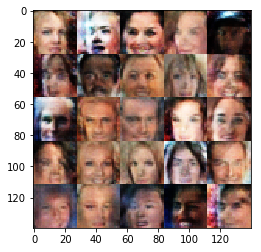

Epoch 1/1.	 Discriminator Loss: 1.3535;  Generator Loss: 0.4903
Epoch 1/1.	 Discriminator Loss: 1.1112;  Generator Loss: 1.2117
Epoch 1/1.	 Discriminator Loss: 1.1047;  Generator Loss: 0.9187
Epoch 1/1.	 Discriminator Loss: 1.1187;  Generator Loss: 0.8892
Epoch 1/1.	 Discriminator Loss: 1.0500;  Generator Loss: 0.8127
Epoch 1/1.	 Discriminator Loss: 0.8595;  Generator Loss: 1.1700
Epoch 1/1.	 Discriminator Loss: 0.9367;  Generator Loss: 1.2809
Epoch 1/1.	 Discriminator Loss: 1.0882;  Generator Loss: 0.8739
Epoch 1/1.	 Discriminator Loss: 1.2497;  Generator Loss: 1.8280
Epoch 1/1.	 Discriminator Loss: 1.0368;  Generator Loss: 0.7025


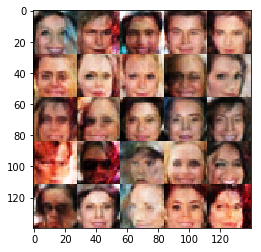

Epoch 1/1.	 Discriminator Loss: 1.3762;  Generator Loss: 0.4284
Epoch 1/1.	 Discriminator Loss: 1.2585;  Generator Loss: 0.4910
Epoch 1/1.	 Discriminator Loss: 1.2666;  Generator Loss: 0.5713
Epoch 1/1.	 Discriminator Loss: 1.2951;  Generator Loss: 0.6376
Epoch 1/1.	 Discriminator Loss: 1.0188;  Generator Loss: 1.3733
Epoch 1/1.	 Discriminator Loss: 1.5279;  Generator Loss: 0.3312


In [17]:
batch_size = 64
z_dim = 128
learning_rate = 0.001
beta1 = 0.35

batch_size = 64
z_dim = 128
learning_rate = 0.001
beta1 = 0.35


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.